In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '../Data/Bond Fund.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Bond Fund,3.225439e+11,2.810605e+09,114.7596,114.7596,114.7596,2022-12-30
1,Bond Fund,3.222014e+11,2.808387e+09,114.7283,114.7283,114.7283,2022-12-29
2,Bond Fund,3.222402e+11,2.809500e+09,114.6966,114.6966,114.6966,2022-12-28
3,Bond Fund,3.210103e+11,2.802004e+09,114.5646,114.5646,114.5646,2022-12-27
4,Bond Fund,3.192994e+11,2.790119e+09,114.4393,114.4393,114.4393,2022-12-23


In [4]:
# Assuming you already have a DataFrame called 'df'
data['Date Valued'] = pd.to_datetime(data['Date Valued'])

In [5]:
df=data[['Scheme Name','Net Asset Value','Outstanding Number of Units','Nav Per Unit','Sale Price per Unit','Repurchase Price/Unit','Date Valued']]
df.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Bond Fund,3.225439e+11,2.810605e+09,114.7596,114.7596,114.7596,2022-12-30
1,Bond Fund,3.222014e+11,2.808387e+09,114.7283,114.7283,114.7283,2022-12-29
2,Bond Fund,3.222402e+11,2.809500e+09,114.6966,114.6966,114.6966,2022-12-28
3,Bond Fund,3.210103e+11,2.802004e+09,114.5646,114.5646,114.5646,2022-12-27
4,Bond Fund,3.192994e+11,2.790119e+09,114.4393,114.4393,114.4393,2022-12-23


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Net Asset Value,771.0,117202310696.832962,16110645659.73,48515975416.994995,88641043113.429993,175311568482.049988,322543871717.299988,84059333320.913269
Outstanding Number of Units,771.0,1054719439.591764,158929423.83,460168481.695,818539643.84,1564530504.215,2810605055.48,727271999.10463
Nav Per Unit,771.0,108.741697,101.3698,105.14085,108.4707,112.1497,114.7596,3.651384
Sale Price per Unit,771.0,108.741697,101.3698,105.14085,108.4707,112.1497,114.7596,3.651384
Repurchase Price/Unit,771.0,108.741697,101.3698,105.14085,108.4707,112.1497,114.7596,3.651384
Date Valued,771,2021-06-05 15:50:39.688715776,2019-11-12 00:00:00,2020-08-24 12:00:00,2021-06-09 00:00:00,2022-03-14 12:00:00,2022-12-30 00:00:00,NaN


In [7]:
#log transformation
df['Log_NAV'] = np.log(df['Net Asset Value'])

# Square Root Transformation
df['Sqrt_NAV'] = np.sqrt(df['Net Asset Value'])

#log transformation
df['Log_ONU'] = np.log(df['Outstanding Number of Units'])

# Square Root Transformation
df['Sqrt_ONU'] = np.sqrt(df['Outstanding Number of Units'])

from scipy.stats.mstats import winsorize
df['Winsorized_ONU'] = winsorize(df['Outstanding Number of Units'], limits=[0.01, 0.01])

# Display the first few rows to check the results
print(df[['Net Asset Value', 'Sqrt_ONU', 'Log_ONU','Winsorized_ONU', 'Sqrt_NAV', 'Log_NAV']].head())

   Net Asset Value      Sqrt_ONU    Log_ONU  Winsorized_ONU       Sqrt_NAV  \
0     3.225439e+11  53015.139870  21.756666    2.767281e+09  567929.460160   
1     3.222014e+11  52994.213721  21.755876    2.767281e+09  567627.841004   
2     3.222402e+11  53004.713238  21.756272    2.767281e+09  567662.034576   
3     3.210103e+11  52933.957956  21.753601    2.767281e+09  566577.734540   
4     3.192994e+11  52821.579155  21.749350    2.767281e+09  565065.798063   

     Log_NAV  
0  26.499505  
1  26.498443  
2  26.498563  
3  26.494739  
4  26.489395  


In [8]:
nav = df[['Sqrt_NAV', 'Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit','Date Valued']]
nav.head()

,Sqrt_NAV,Log_ONU,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,567929.460160,21.756666,114.7596,114.7596,114.7596,2022-12-30
1,567627.841004,21.755876,114.7283,114.7283,114.7283,2022-12-29
2,567662.034576,21.756272,114.6966,114.6966,114.6966,2022-12-28
3,566577.734540,21.753601,114.5646,114.5646,114.5646,2022-12-27
4,565065.798063,21.749350,114.4393,114.4393,114.4393,2022-12-23


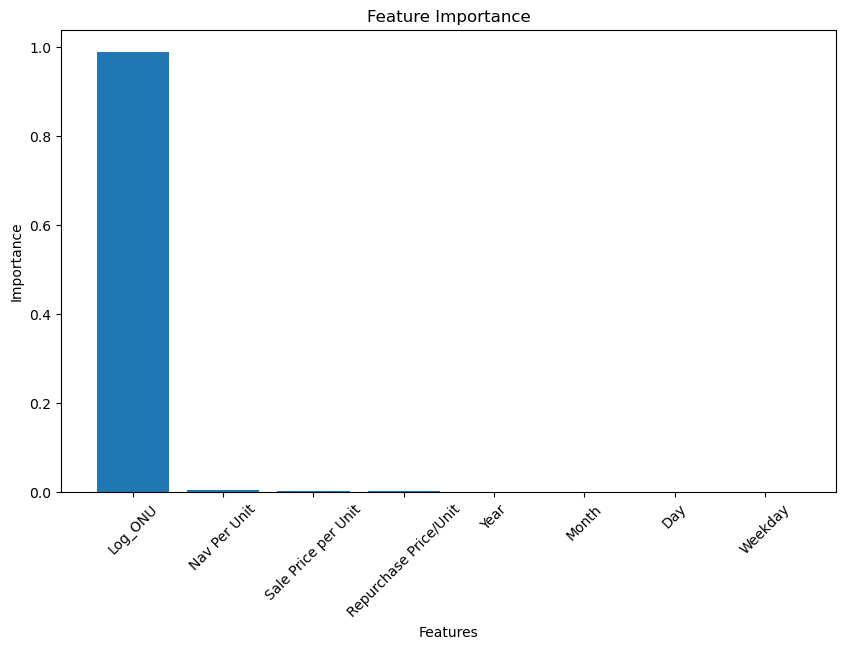

In [9]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming 'nav' is your DataFrame with a 'Date Valued' column
nav['Year'] = nav['Date Valued'].dt.year
nav['Month'] = nav['Date Valued'].dt.month
nav['Day'] = nav['Date Valued'].dt.isocalendar().week
nav['Day'] = nav['Date Valued'].dt.day
nav['Weekday'] = nav['Date Valued'].dt.weekday

# Now, drop the original 'Date Valued' column as it's no longer needed as a feature
nav = nav.drop(columns=['Date Valued'])

# Define your features (X) and target (y)
X = nav.drop(columns=['Sqrt_NAV'])
y = nav['Sqrt_NAV']

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [10]:
# nav.to_csv('NAV Bond Fund.csv', index=False)
# nav.head()

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
# X should be a DataFrame with multiple columns, not a Series
X = nav[['Log_ONU']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Calculate accuracy metrics for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)

# Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Return accuracy metrics for Gradient Boosting and Random Forest
accuracy_metrics = {
    'Gradient Boosting MAE': gb_mae,
    'Gradient Boosting RMSE': gb_rmse,
    'Gradient Boosting R^2': gb_r2,
    'Random Forest MAE': rf_mae,
    'Random Forest RMSE': rf_rmse,
    'Random Forest R^2': rf_r2,
}

accuracy_metrics


{'Gradient Boosting MAE': 901.7122361645844,
 'Gradient Boosting RMSE': 1197.8085750609675,
 'Gradient Boosting R^2': 0.9999043931003153,
 'Random Forest MAE': 503.7390483884649,
 'Random Forest RMSE': 756.6934617894547,
 'Random Forest R^2': 0.9999618447448189}

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Iterate through the models and evaluate their performance
for name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


          Model Name           MAE           MSE          RMSE       R^2
0  Linear Regression  18919.508877  4.993803e+08  22346.817736  96.6723%
1      Decision Tree    660.312352  8.961667e+05    946.660810  99.9940%
2      Random Forest    512.366784  6.183830e+05    786.373335  99.9959%
3  Gradient Boosting    660.312352  8.961667e+05    946.660810  99.9940%
4      KNN Regressor    828.976129  3.499781e+06   1870.770094  99.9767%
5  XGBoost Regressor    661.800928  8.965820e+05    946.880157  99.9940%


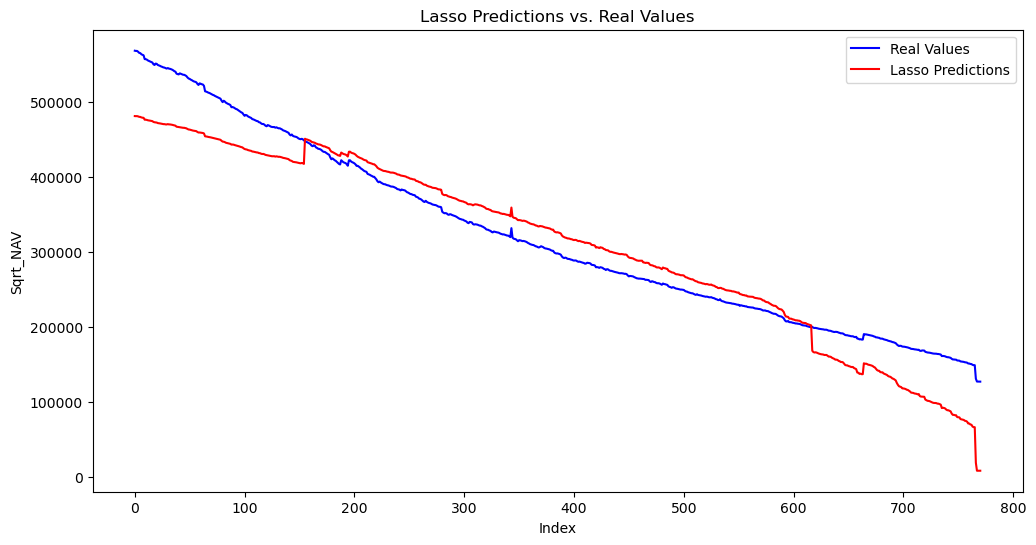

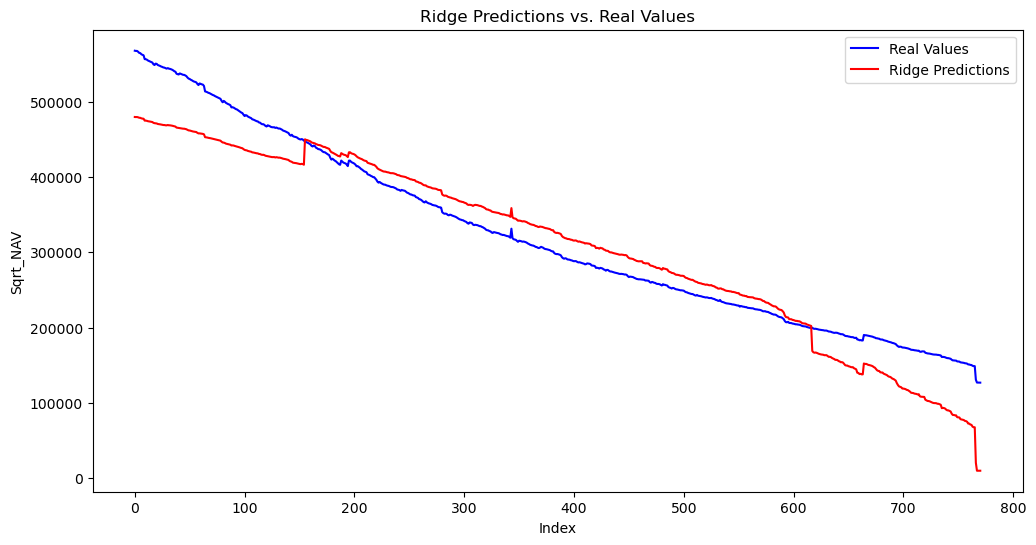

Lasso Results:
       Real Values  Lasso Predictions
0    567929.460160      480842.423904
1    567627.841004      480732.517290
2    567662.034576      480787.667420
3    566577.734540      480415.804313
4    565065.798063      479824.160767
..             ...                ...
766  130803.193300       18754.229295
767  127055.969707        8206.491755
768  126978.539757        8206.491755
769  126953.126221        8206.491755
770  126927.718248        8206.491755

[771 rows x 2 columns]

Ridge Results:
       Real Values  Ridge Predictions
0    567929.460160      479893.411880
1    567627.841004      479784.009730
2    567662.034576      479838.906724
3    566577.734540      479468.750440
4    565065.798063      478879.822493
..             ...                ...
766  130803.193300       20403.586455
767  127055.969707        9907.286619
768  126978.539757        9907.286619
769  126953.126221        9907.286619
770  126927.718248        9907.286619

[771 rows x 2 columns]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Perform cross-validation and make predictions for Lasso and Ridge
lasso_predictions = cross_val_predict(lasso_model, X, y, cv=5)
ridge_predictions = cross_val_predict(ridge_model, X, y, cv=5)

# Create line plots with real values as blue lines and predicted values as red lines for Lasso
plt.figure(figsize=(12, 6))
plt.plot(y, color='blue', label='Real Values')
plt.plot(lasso_predictions, color='red', label='Lasso Predictions')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Lasso Predictions vs. Real Values')
plt.legend()
plt.show()

# Create line plots with real values as blue lines and predicted values as red lines for Ridge
plt.figure(figsize=(12, 6))
plt.plot(y, color='blue', label='Real Values')
plt.plot(ridge_predictions, color='red', label='Ridge Predictions')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Ridge Predictions vs. Real Values')
plt.legend()
plt.show()

# Create a DataFrame to store real values and predicted values for Lasso
lasso_results_df = pd.DataFrame({'Real Values': y, 'Lasso Predictions': lasso_predictions})

# Create a DataFrame to store real values and predicted values for Ridge
ridge_results_df = pd.DataFrame({'Real Values': y, 'Ridge Predictions': ridge_predictions})

# Display the results DataFrames
print("Lasso Results:")
print(lasso_results_df)

print("\nRidge Results:")
print(ridge_results_df)

Model Evaluation Metrics:
          Model Name           MAE           MSE          RMSE       R^2
0  Linear Regression  18919.508877  4.993803e+08  22346.817736  96.6723%
1      Decision Tree    660.312352  8.961667e+05    946.660810  99.9940%
2      Random Forest    512.366784  6.183830e+05    786.373335  99.9959%
3  Gradient Boosting    660.312352  8.961667e+05    946.660810  99.9940%
4      KNN Regressor    828.976129  3.499781e+06   1870.770094  99.9767%
5  XGBoost Regressor    661.800928  8.965820e+05    946.880157  99.9940%


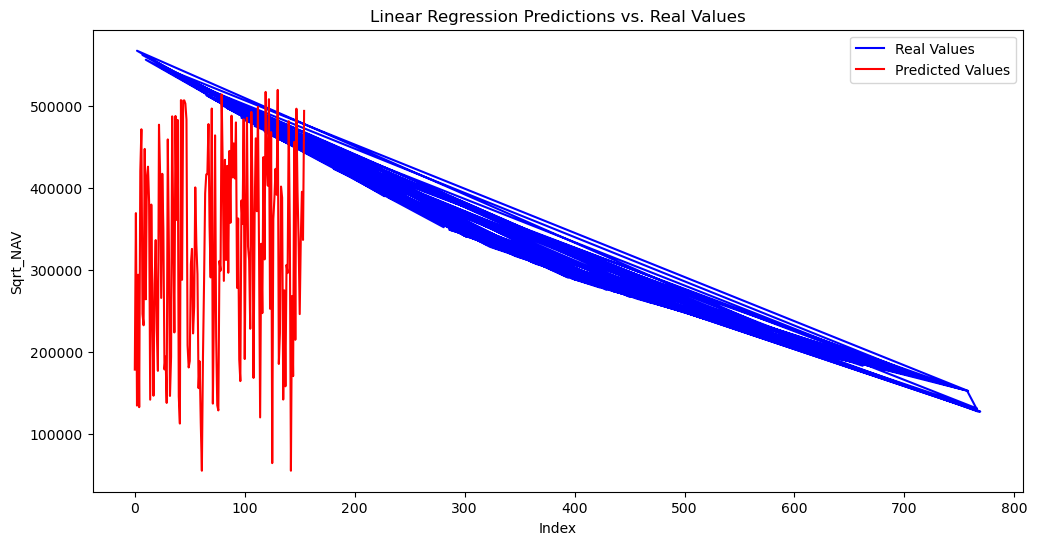

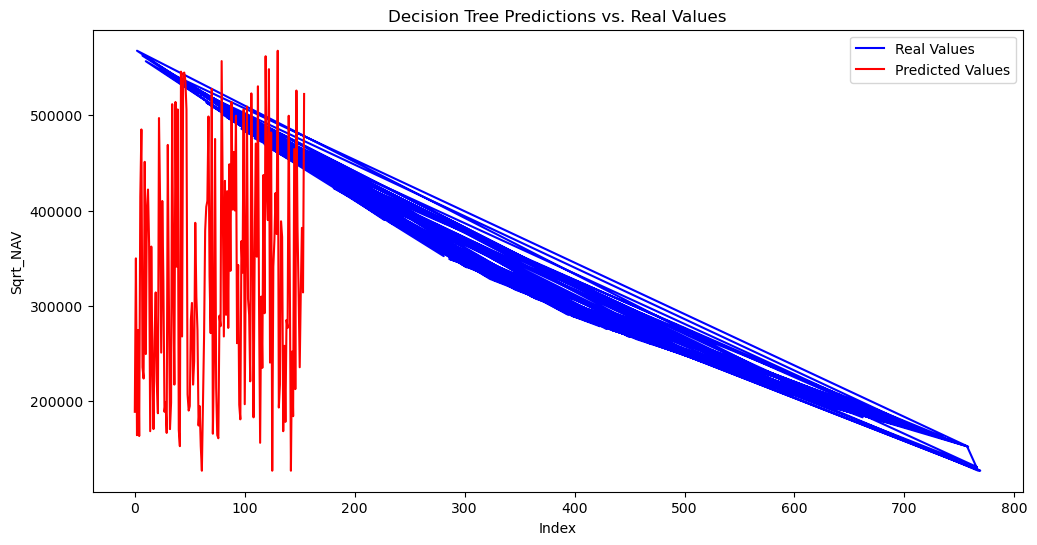

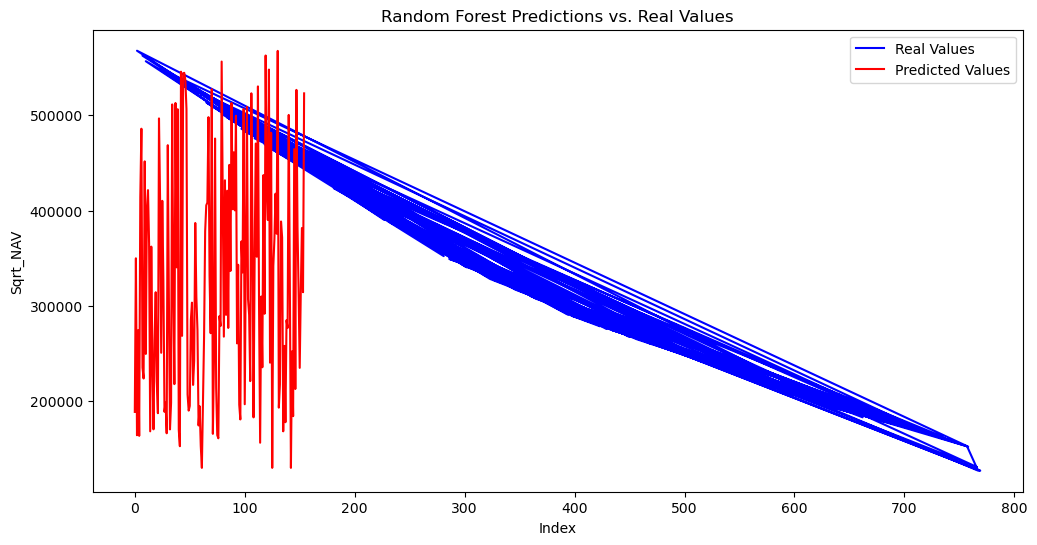

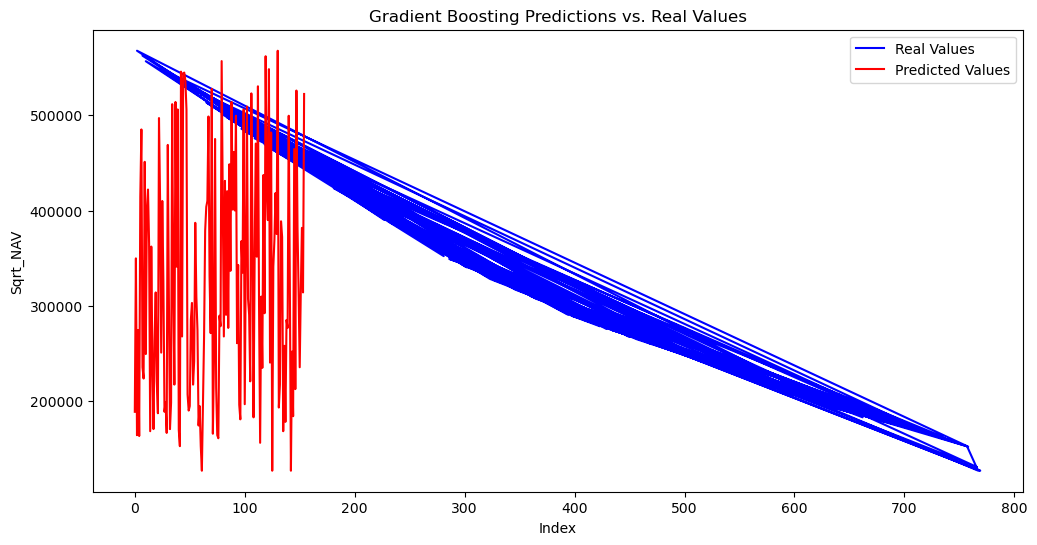

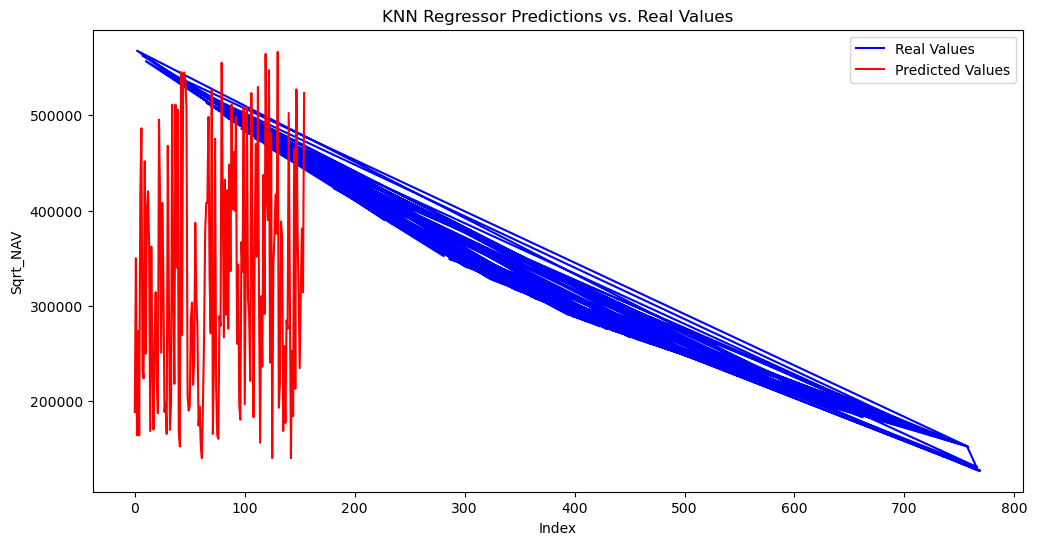

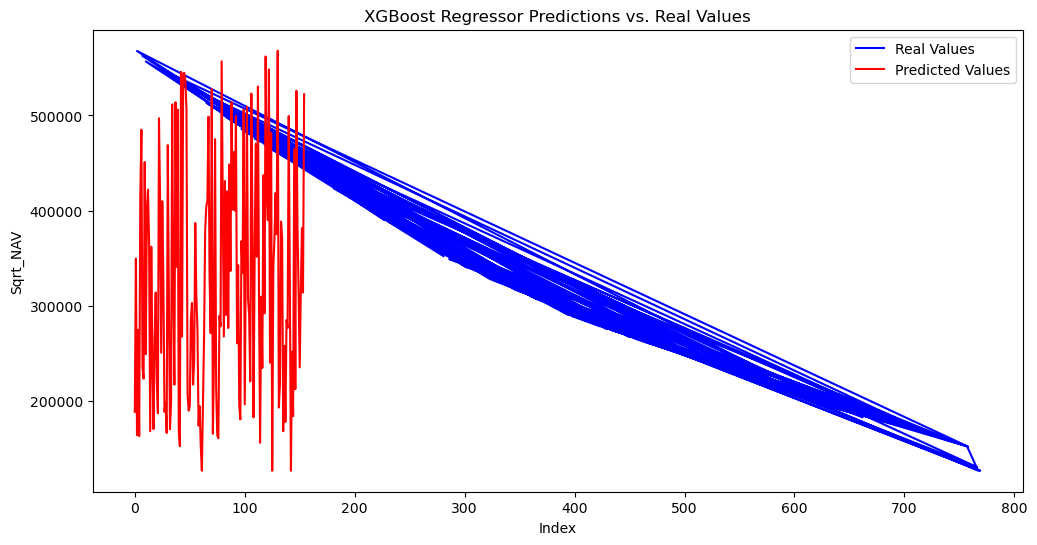

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Create a dictionary to store real values and predicted values for each model
model_predictions = {}

# Iterate through the models and evaluate their performance
for name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

    # Store real values and predicted values in the dictionary
    model_predictions[name] = {'Real Values': y_test, 'Predicted Values': predictions}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("Model Evaluation Metrics:")
print(results_df)

# Create line plots with real values as blue lines and predicted values as red lines for each model
for name, predictions in model_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(predictions['Real Values'], color='blue', label='Real Values')
    plt.plot(predictions['Predicted Values'], color='red', label='Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Sqrt_NAV')
    plt.title(f'{name} Predictions vs. Real Values')
    plt.legend()
    plt.show()

Cross-Validation Model Evaluation Metrics:
          Model Name           MAE           MSE          RMSE       R^2
0  Linear Regression  34007.989861  1.633157e+09  40412.337820  88.6685%
1      Decision Tree  29286.230501  1.497186e+09  38693.492250  89.6120%
2      Random Forest  29313.123233  1.500287e+09  38733.536380  89.5905%
3  Gradient Boosting  29286.230501  1.497186e+09  38693.492250  89.6120%
4      KNN Regressor  29770.117851  1.535156e+09  39181.065471  89.3485%
5  XGBoost Regressor  29286.224072  1.497187e+09  38693.502751  89.6120%


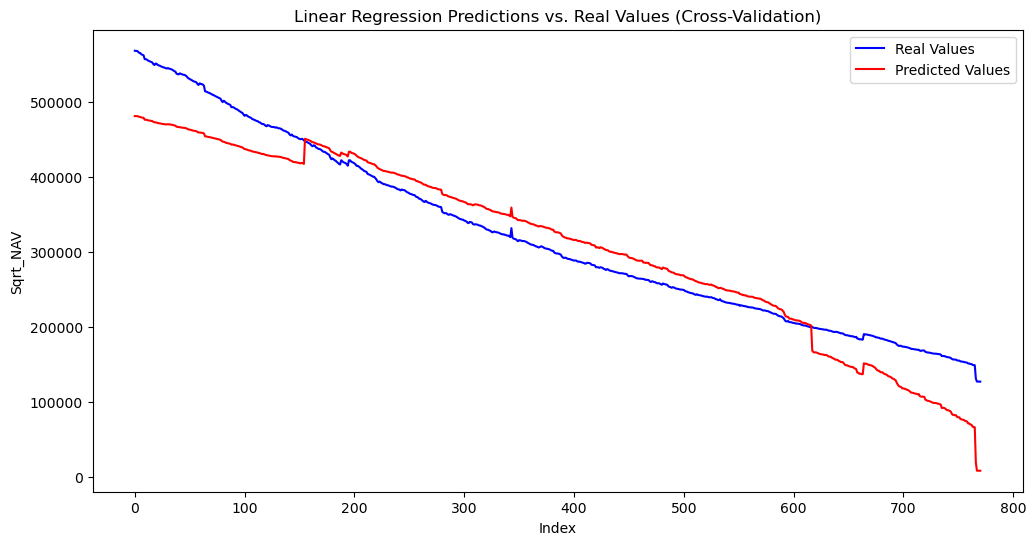

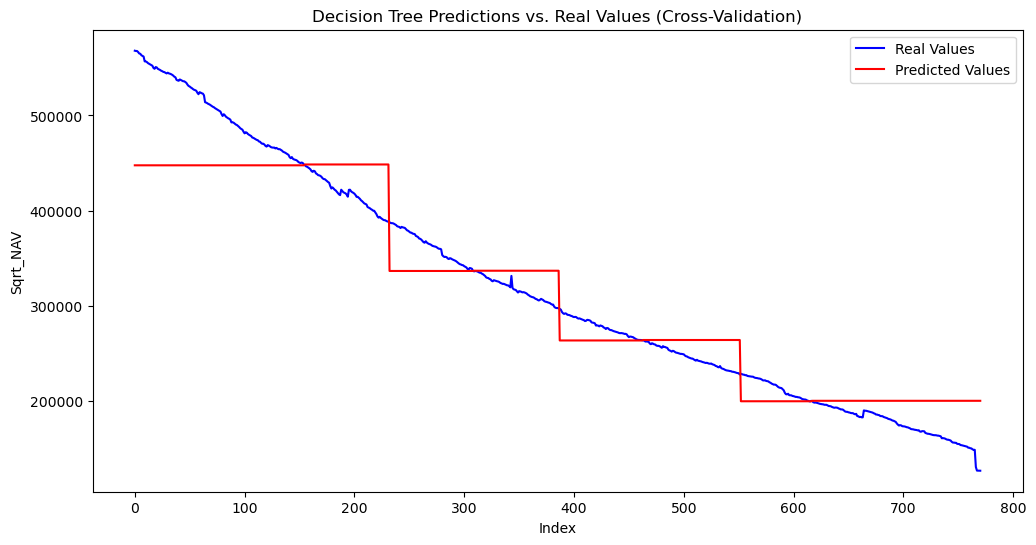

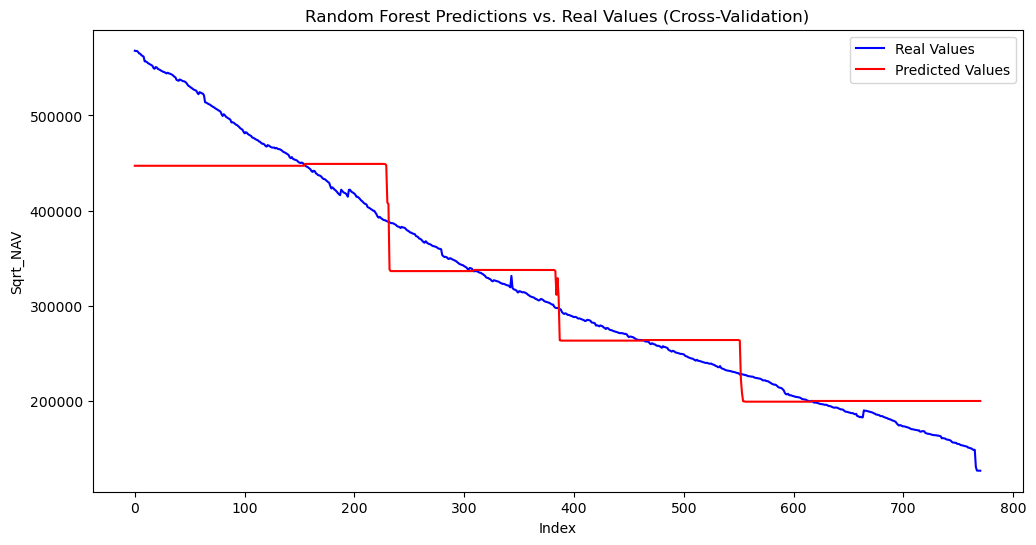

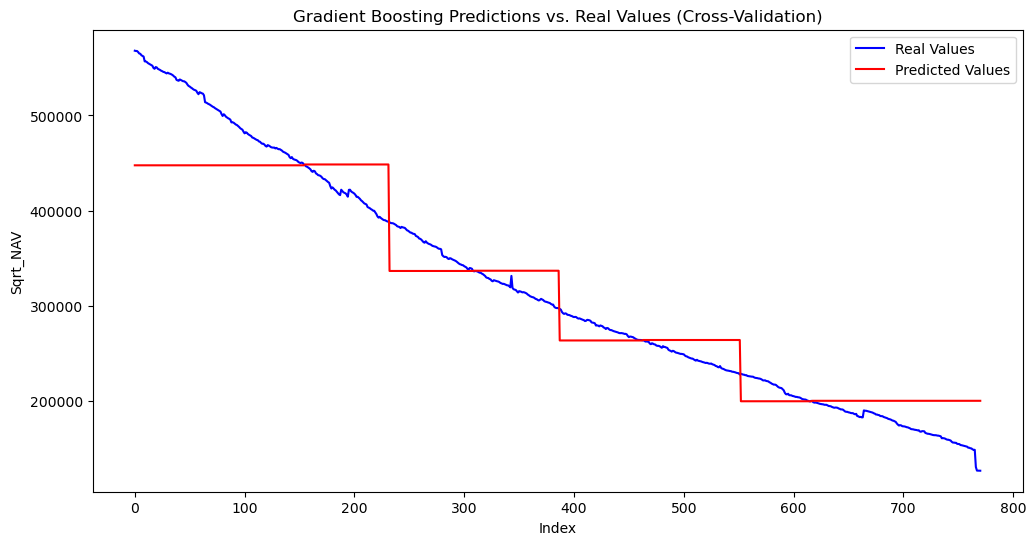

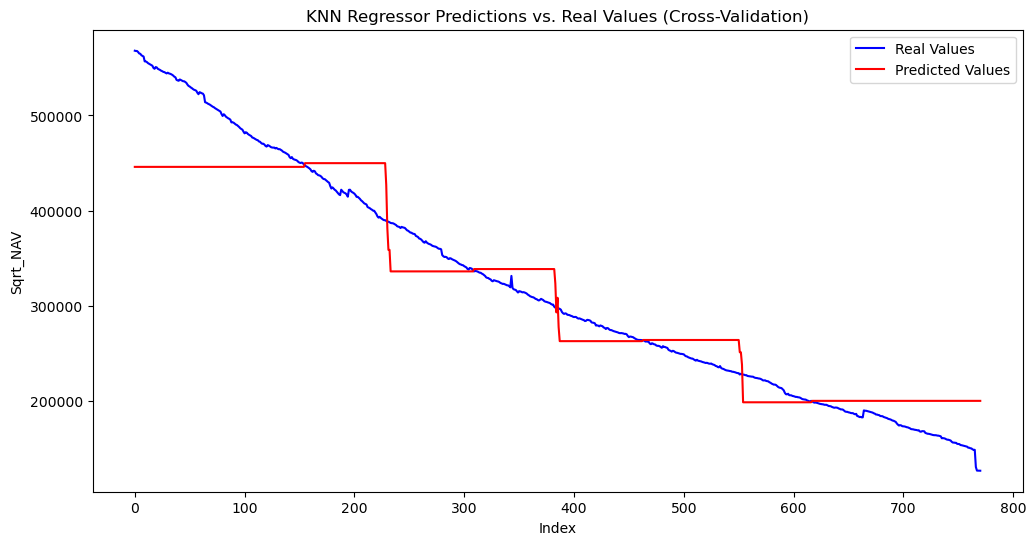

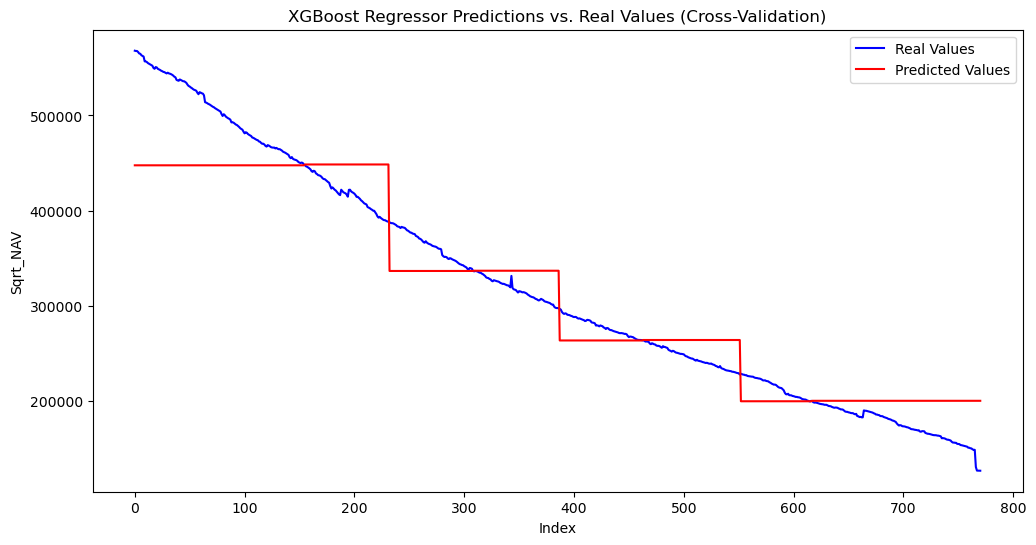

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Create a dictionary to store real values and predicted values for each model
model_predictions = {}

# Iterate through the models and evaluate their performance using cross-validation
for name, model in models.items():
    # Perform cross-validation to get predictions
    predictions = cross_val_predict(model, X, y, cv=5)

    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

    # Store real values and predicted values in the dictionary
    model_predictions[name] = {'Real Values': y, 'Predicted Values': predictions}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("Cross-Validation Model Evaluation Metrics:")
print(results_df)

# Create line plots with real values as blue lines and predicted values as red lines for each model
for name, predictions in model_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(predictions['Real Values'], color='blue', label='Real Values')
    plt.plot(predictions['Predicted Values'], color='red', label='Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Sqrt_NAV')
    plt.title(f'{name} Predictions vs. Real Values (Cross-Validation)')
    plt.legend()
    plt.show()

## Hyper parameter tuning

Best Lasso Alpha: 10.0
Best Ridge Alpha: 10.0


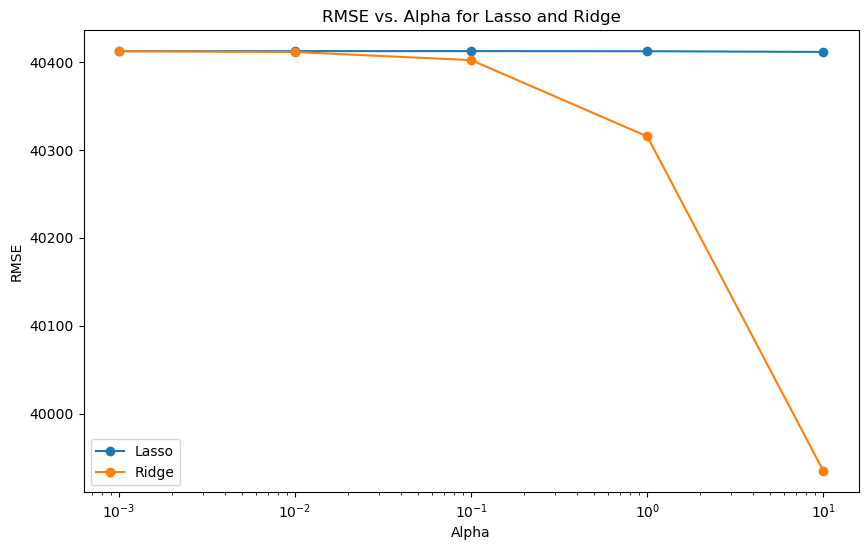

Lasso RMSE on Test Data: 22345.492801175093
Ridge RMSE on Test Data: 22308.038060848874


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to search through
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]  # You can adjust this range as needed

# Initialize lists to store results
lasso_rmse_scores = []
ridge_rmse_scores = []

# Iterate through alpha values and perform hyperparameter tuning
for alpha in alphas:
    # Create Lasso and Ridge regression models with the current alpha
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)
    
    # Perform cross-validation and calculate RMSE for Lasso and Ridge
    lasso_predictions = cross_val_predict(lasso_model, X, y, cv=5)
    ridge_predictions = cross_val_predict(ridge_model, X, y, cv=5)
    
    # Calculate RMSE for each model
    lasso_rmse = np.sqrt(mean_squared_error(y, lasso_predictions))
    ridge_rmse = np.sqrt(mean_squared_error(y, ridge_predictions))
    
    # Append RMSE scores to the respective lists
    lasso_rmse_scores.append(lasso_rmse)
    ridge_rmse_scores.append(ridge_rmse)

# Find the best alpha value for each model
best_lasso_alpha = alphas[np.argmin(lasso_rmse_scores)]
best_ridge_alpha = alphas[np.argmin(ridge_rmse_scores)]

print("Best Lasso Alpha:", best_lasso_alpha)
print("Best Ridge Alpha:", best_ridge_alpha)

# Plot RMSE scores for Lasso and Ridge across different alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_rmse_scores, marker='o', label='Lasso')
plt.plot(alphas, ridge_rmse_scores, marker='o', label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha for Lasso and Ridge')
plt.xscale('log')  # Since alpha values are typically on a logarithmic scale
plt.legend()
plt.show()

# Once you have the best alpha values, you can train the final models with these values
best_lasso_model = Lasso(alpha=best_lasso_alpha)
best_ridge_model = Ridge(alpha=best_ridge_alpha)

best_lasso_model.fit(X_train, y_train)
best_ridge_model.fit(X_train, y_train)

# Make predictions using the best models
lasso_predictions = best_lasso_model.predict(X_test)
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the best models on the test set (you can calculate RMSE, MAE, R^2, etc.)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print("Lasso RMSE on Test Data:", lasso_rmse)
print("Ridge RMSE on Test Data:", ridge_rmse)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models with the best alpha values
best_lasso_alpha = 0.01  # Replace with the best alpha you found
best_ridge_alpha = 0.1  # Replace with the best alpha you found

lasso_model = Lasso(alpha=best_lasso_alpha)
ridge_model = Ridge(alpha=best_ridge_alpha)

# Create a list of tuples containing model names and their corresponding models
models = [('Lasso', lasso_model), ('Ridge', ridge_model)]

# Create a VotingRegressor as the ensemble model
ensemble_model = VotingRegressor(models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the ensemble model on the test set
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))

print("Ensemble RMSE on Test Data:", ensemble_rmse)

Ensemble RMSE on Test Data: 22345.078467540934


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models with the best alpha values
best_lasso_alpha = 0.01  # Replace with the best alpha you found
best_ridge_alpha = 0.1  # Replace with the best alpha you found

lasso_model = Lasso(alpha=best_lasso_alpha)
ridge_model = Ridge(alpha=best_ridge_alpha)

# Create a list of tuples containing model names and their corresponding models
models = [('Lasso', lasso_model), ('Ridge', ridge_model)]

# Create a VotingRegressor as the ensemble model
ensemble_model = VotingRegressor(models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, ensemble_predictions)
mse = mean_squared_error(y_test, ensemble_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ensemble_predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - ensemble_predictions) / y_test)) * 100

# Calculate Theil's U
theil_u = np.sqrt(np.mean(((y_test - ensemble_predictions) ** 2) / (y_test ** 2)))

# Calculate daily returns
daily_returns = y_test.pct_change().dropna()

# Calculate annualized returns
def calculate_annualized_returns(returns):
    total_return = np.prod(1 + returns) - 1
    num_years = len(returns) / 252  # Assuming 252 trading days in a year
    annualized_return = (1 + total_return) ** (1 / num_years) - 1
    return annualized_return

annualized_returns = calculate_annualized_returns(daily_returns)

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    risk_free_rate = 0.03  # Replace with the appropriate risk-free rate
    excess_returns = returns - risk_free_rate
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)
    sharpe_ratio = mean_excess_return / std_excess_return
    return sharpe_ratio

sharpe_ratio = calculate_sharpe_ratio(daily_returns)

# Create a summary table
metrics_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared', 'MAPE', "Theil's U", 'Annualized Returns', 'Sharpe Ratio'],
    'Value': [mae, mse, rmse ,r2, mape, theil_u, annualized_returns, sharpe_ratio],
    'Interpretation': ['Lower is better', 'Lower is better', 'Lower is better', 'Closer to 1 is better',
                       'Lower is better', 'Lower is better', 'Positive values are better', 'Higher is better']
}

metrics_df = pd.DataFrame(metrics_dict)

# Print the summary table
print(metrics_df)

               Metric         Value              Interpretation
0                 MAE  1.891802e+04             Lower is better
1                 MSE  4.993025e+08             Lower is better
2                RMSE  2.234508e+04             Lower is better
3           R-squared  9.667281e-01       Closer to 1 is better
4                MAPE  7.118147e+00             Lower is better
5           Theil's U  1.080556e-01             Lower is better
6  Annualized Returns  4.334266e+00  Positive values are better
7        Sharpe Ratio  2.015482e-01            Higher is better


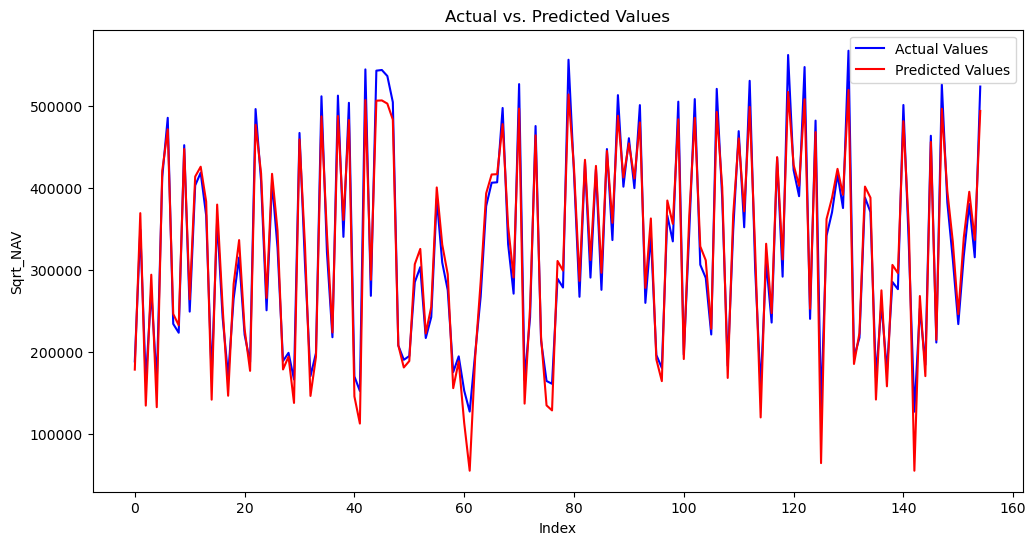

In [26]:
# Create a line plot to visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, color='blue', label='Actual Values')
plt.plot(ensemble_predictions, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Forecasting six months later

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt

# Assuming 'nav' is your DataFrame with 'Log_ONU', 'Sqrt_NAV', and 'Target_NAV' columns
# Shift the 'Sqrt_NAV' values forward by six months to create the target variable
nav['Target_NAV'] = nav['Sqrt_NAV'].shift(-126)  # Assuming 21 trading days per month

# Fill missing target values using forward fill (ffill)
nav['Target_NAV'].fillna(method='ffill', inplace=True)

# Prepare your features and target variable
X = nav[['Log_ONU','Year', 'Month', 'Day', 'Weekday']]
y = nav['Target_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models with the best alpha values
best_lasso_alpha = 0.01  # Replace with the best alpha you found
best_ridge_alpha = 0.1  # Replace with the best alpha you found

lasso_model = Lasso(alpha=best_lasso_alpha)
ridge_model = Ridge(alpha=best_ridge_alpha)

# Create a list of tuples containing model names and their corresponding models
models = [('Lasso', lasso_model), ('Ridge', ridge_model)]

# Create a VotingRegressor as the ensemble model
ensemble_model = VotingRegressor(models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model for the six months ahead target variable
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate the metrics for your six months ahead NAV forecasts
mae = mean_absolute_error(y_test, ensemble_predictions)
mse = mean_squared_error(y_test, ensemble_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ensemble_predictions)
mape = np.mean(np.abs((y_test - ensemble_predictions) / y_test)) * 100
theil_u = np.sqrt(np.mean(((y_test - ensemble_predictions) ** 2) / (y_test ** 2)))

# Create a summary table for the evaluation metrics
metrics_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared', 'MAPE', "Theil's U"],
    'Value': [mae, mse, rmse, r2, mape, theil_u],
    'Interpretation': ['Lower is better', 'Lower is better', 'Lower is better', 'Closer to 1 is better',
                       'Lower is better', 'Lower is better']
}

metrics_df = pd.DataFrame(metrics_dict)

# Print the summary table
print(metrics_df)

      Metric         Value         Interpretation
0        MAE  1.227601e+04        Lower is better
1        MSE  2.185422e+08        Lower is better
2       RMSE  1.478317e+04        Lower is better
3  R-squared  9.788771e-01  Closer to 1 is better
4       MAPE  5.399999e+00        Lower is better
5  Theil's U  7.164350e-02        Lower is better


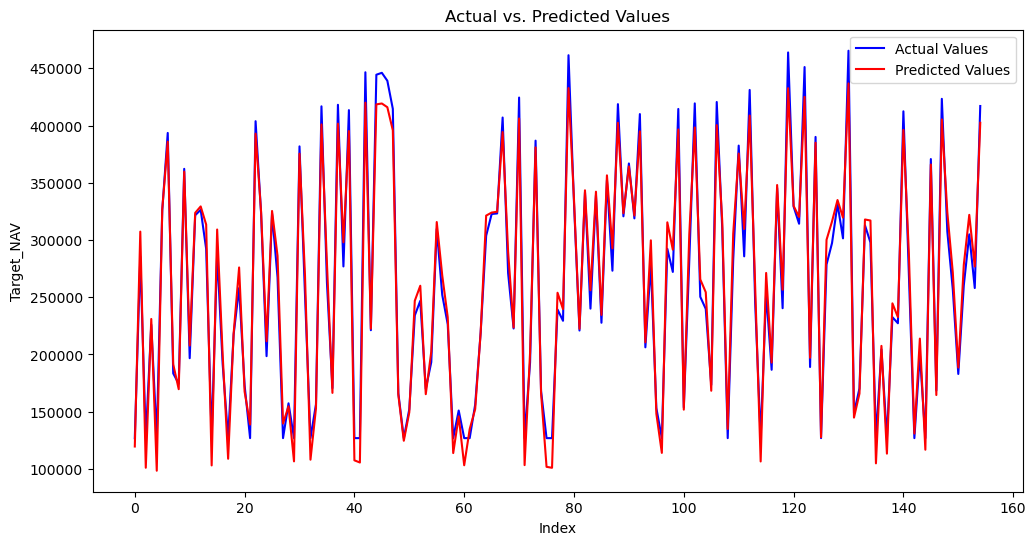

In [28]:
# Create a line plot to visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, color='blue', label='Actual Values')
plt.plot(ensemble_predictions, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Target_NAV')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [29]:
X_test.head()

,Log_ONU,Year,Month,Day,Weekday
671,19.646675,2020,4,7,1
286,20.826876,2021,11,1,0
728,19.375202,2020,1,15,2
434,20.362431,2021,3,24,2
734,19.363318,2020,1,8,2


In [30]:
X_train.head()

,Log_ONU,Year,Month,Day,Weekday
557,20.009227,2020,9,22,1
464,20.285766,2021,2,9,1
296,20.792333,2021,10,15,4
467,20.282703,2021,2,4,3
342,20.655835,2021,8,10,1
